# Create a spam classifier: ML problem statement
Dataset taken from: https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

In [ ]:
# Check the dataset downloaded to disk
entries = os.listdir('/home/sandeep/Development/Datasets/Telecom/smsspamcollection/')
with open('/home/sandeep/Development/Datasets/Telecom/smsspamcollection/'+entries[0], 'r') as f:
    for line in f:
        print(line)

In [58]:
# Load the data in a pandas dataframe

import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/home/sandeep/Development/Datasets/Telecom/smsspamcollection/SMSSpamCollection', 
                 sep='\t', header=None, names=['label', 'message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [60]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [61]:
# Data cleaning and preprocessing for vectorization

corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [67]:
# Converting the list of words into bag of words vector
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [68]:
X.shape

(5572, 5000)

In [69]:
# Convert the list of words into TFIDF vector
tv = TfidfVectorizer(max_features=5000)
X2 = tv.fit_transform(corpus).toarray()

In [70]:
X2.shape

(5572, 5000)

In [71]:
X, X2

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [75]:
X2.mean(), X2.min(), X2.max()

(0.0005074206671923064, 0.0, 1.0)

In [82]:
# Dummy encoding the label column
y = pd.get_dummies(df.label, drop_first=True)
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [86]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

In [87]:
# Train the model using Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [88]:
# Predict the values using test data
preds = model.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

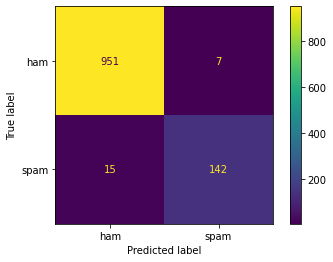

In [91]:
# Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
ConfusionMatrixDisplay.from_predictions(preds, y_test, labels=[0,1], display_labels=['ham', 'spam'])

In [92]:
# Compute the accuracy
accuracy_score(preds, y_test)

0.9802690582959641

## This was done using bag of words technique, accuracy achieved is 98%. Next we will use TFIDF.

In [93]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y.values.ravel(), test_size=0.2, random_state=42)

In [94]:
# Train the model using Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [95]:
# Predict the values using test data
preds = model.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

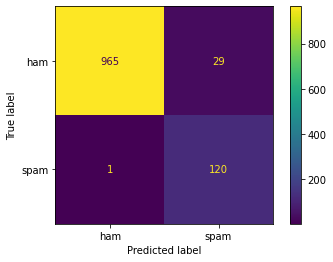

In [96]:
# Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
ConfusionMatrixDisplay.from_predictions(preds, y_test, labels=[0,1], display_labels=['ham', 'spam'])

In [97]:
# Compute the accuracy
accuracy_score(preds, y_test)

0.9730941704035875

## Accuracy achieved with TFIDF is 97.3%, almost same as earlier